# (08) Wild play

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from copy import deepcopy as dc
from os.path import join as pjoin
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-MTMST/_extras')
fig_base_dir = pjoin(git_dir, 'jb-MTMST/figs')
tmp_dir = pjoin(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_MTMST'))
from utils.plotting import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
from rich.jupyter import print
%matplotlib inline
set_style()

In [13]:
path = '/home/hadi/Documents/MTMST/Wild22/data'
expt = 'amm-MSTn-sun-090-01+01-task'
f = pjoin(path, 'MSTn', f'{expt}.h5')
f = h5py.File(f, 'r')

In [4]:
x = np.array(f['event_value']['SPIKE_channelUnit'])
x.shape

(74089, 1)

<AxesSubplot:ylabel='Count'>

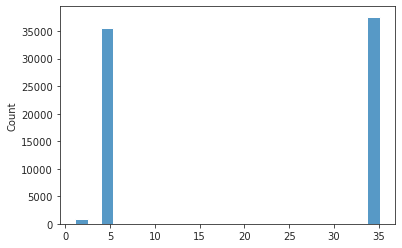

In [5]:
sns.histplot(x.ravel())

In [6]:
x = np.array(f['event_value']['STIM_nDimRDP_posX'])
y = np.array(f['event_value']['STIM_nDimRDP_posY'])
x.shape, y.shape

((726, 1), (726, 1))

In [7]:
x = np.array(f['event_value']['STIM_nDimRDP_probePosition'])
x.shape

(21952,)

In [8]:
start = np.array(f['event_time']['TRIAL_start'])
end = np.array(f['event_time']['TRIAL_end'])
start.shape, end.shape

((728, 1), (728, 1))

In [9]:
duration = (end - start) / 1e6
duration.shape

(728, 1)

In [10]:
duration.sum()

2428.868122

In [12]:
duration.sum() / 60

40.48113536666666

## load velocity

In [118]:
from scipy import io as sio
mat = sio.loadmat(pjoin('/home/hadi/Desktop', f"{expt}.mat"))

rho = mat['sampleSpeeds'].astype(float).reshape((10, 15, -1))
theta = mat['sampleDirections'].astype(float).reshape((10, 15, -1))
v = np.concatenate([
    np.expand_dims(rho * np.cos(theta), 0),
    np.expand_dims(rho * np.sin(theta), 0),
])

rho.shape, theta.shape, v.shape

((10, 15, 21952), (10, 15, 21952), (2, 10, 15, 21952))

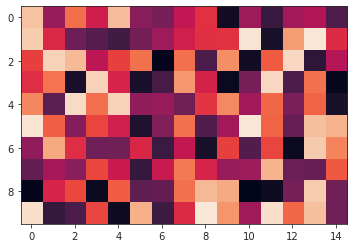

In [119]:
plt.imshow(rho[..., 0], vmin=0, vmax=1);

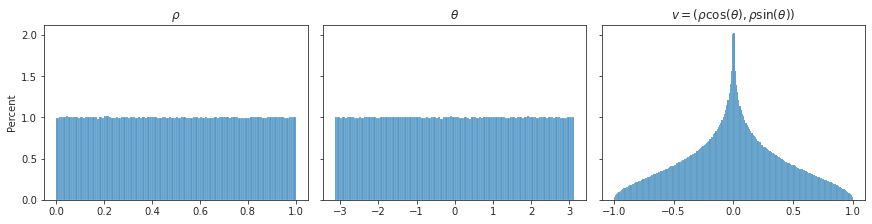

In [120]:
fig, axes = create_figure(1, 3, (12, 3), sharey='row', constrained_layout=True)
sns.histplot(rho.ravel(), stat='percent', bins=np.linspace(0, 1, 101), ax=axes[0])
sns.histplot(theta.ravel(), stat='percent', bins=np.linspace(-np.pi, np.pi, 101), ax=axes[1])
sns.histplot(v.ravel(), stat='percent', bins=np.linspace(-1, 1, 201), ax=axes[2])
axes[0].set_title(r'$\rho$')
axes[1].set_title(r'$\theta$')
axes[2].set_title(r'$v = (\rho \cos(\theta), \rho \sin(\theta))$')
plt.show()

In [121]:
kws1 = {
    'cmap': 'hsv',
    'vmax': np.pi,
    'vmin': -np.pi,
}
kws2 = {
    'cmap': 'rocket',
    'vmax': 1,
    'vmin': 0,
}

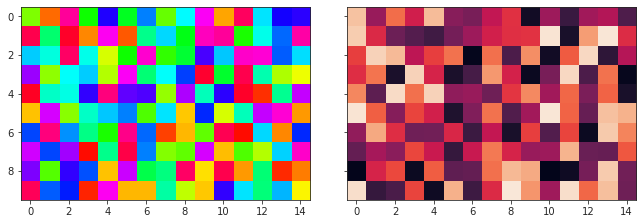

In [122]:
fig, axes = create_figure(1, 2, (9, 3), 'all', 'all', constrained_layout=True)
axes[0].imshow(theta[..., 0], **kws1)
axes[1].imshow(rho[..., 0], **kws2);

In [123]:
theta[..., 0][0] / np.pi

array([-0.485727, -0.855124,  0.82596 , -0.339394,  0.393438, -0.279297,
        0.181391, -0.457322,  0.020875,  0.698079, -0.780676,  0.906142,
        0.047214,  0.380633,  0.406617])

### Load but bring $0 \leq \theta \leq 2\pi$

In [124]:
from scipy import io as sio
mat = sio.loadmat(pjoin('/home/hadi/Desktop', f"{expt}.mat"))

rho = mat['sampleSpeeds'].astype(float).reshape((10, 15, -1))
theta = mat['sampleDirections'].astype(float).reshape((10, 15, -1))
theta += 2 * np.pi
theta %= 2 * np.pi
v = np.concatenate([
    np.expand_dims(rho * np.cos(theta), 0),
    np.expand_dims(rho * np.sin(theta), 0),
])

rho.shape, theta.shape, v.shape

((10, 15, 21952), (10, 15, 21952), (2, 10, 15, 21952))

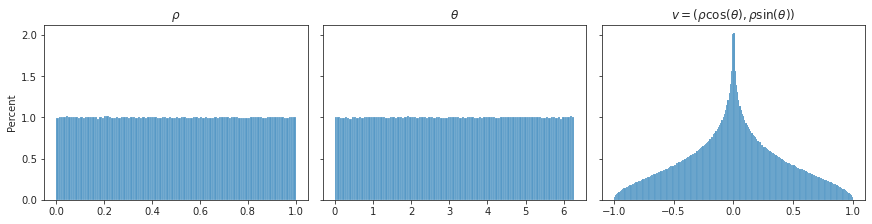

In [125]:
fig, axes = create_figure(1, 3, (12, 3), sharey='row', constrained_layout=True)
sns.histplot(rho.ravel(), stat='percent', bins=np.linspace(0, 1, 101), ax=axes[0])
sns.histplot(theta.ravel(), stat='percent', bins=np.linspace(0, 2 * np.pi, 101), ax=axes[1])
sns.histplot(v.ravel(), stat='percent', bins=np.linspace(-1, 1, 201), ax=axes[2])
axes[0].set_title(r'$\rho$')
axes[1].set_title(r'$\theta$')
axes[2].set_title(r'$v = (\rho \cos(\theta), \rho \sin(\theta))$')
plt.show()

In [126]:
kws1 = {
    'cmap': 'hsv',
    'vmax': 2 * np.pi,
    'vmin': 0,
}
kws2 = {
    'cmap': 'rocket',
    'vmax': 1,
    'vmin': 0,
}

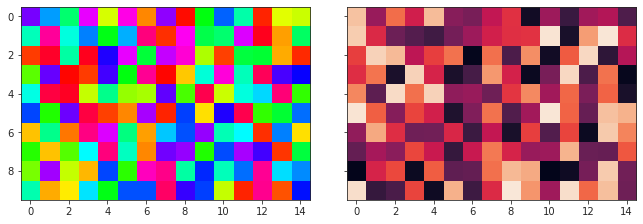

In [127]:
fig, axes = create_figure(1, 2, (9, 3), 'all', 'all', constrained_layout=True)
axes[0].imshow(theta[..., 0], **kws1)
axes[1].imshow(rho[..., 0], **kws2);

In [129]:
theta[..., 0][0] / np.pi

array([1.514273, 1.144876, 0.82596 , 1.660606, 0.393438, 1.720703,
       0.181391, 1.542678, 0.020875, 0.698079, 1.219324, 0.906142,
       0.047214, 0.380633, 0.406617])

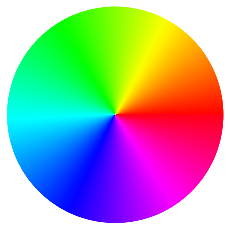

In [128]:
show_hsv();

## load neural data

In [139]:
f = pjoin(path, 'MSTn', f'{expt}.h5')
f = h5py.File(f, 'r')

In [140]:
list(f)

['event_time', 'event_value']

In [145]:
n_trials = len(f['event_time']['TRIAL_start'])
n_trials

728

In [220]:
start = np.array(f['event_time']['TRIAL_start'], dtype=float)
end = np.array(f['event_time']['TRIAL_end'], dtype=float)
duration = (trials['end'] - trials['start']) / 1e6

assert len(start) == len(end) == len(duration)
n_trials = len(start)

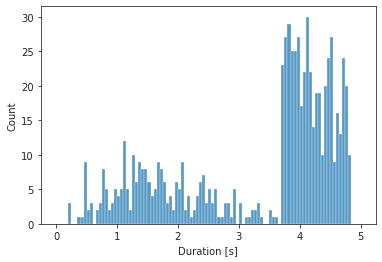

In [222]:
sns.histplot(duration.ravel(), bins=np.linspace(0, 5, 101))
plt.xlabel('Duration [s]');

In [227]:
spk_times = np.array(f['event_time']['SPIKE_channelUnit'], dtype=float)
spk_times_trial = []
for i in range(n_trials):
    x = spk_times[np.logical_and(start[i] - latency <= spk_times, spk_times < end[i])]
    spk_times_trial.append((x - start[i]) / 1e3)
fr = []
for i in range(n_trials):
    fr.append(len([e for e in spk_times_trial[i] if e >= 0]) / duration[i, 0])

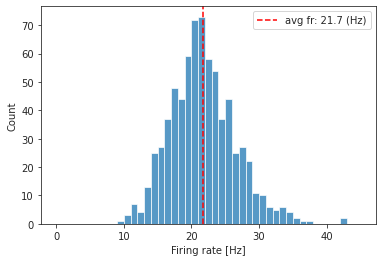

In [233]:
sns.histplot(fr, bins=np.linspace(0, 45, 45 + 1))
plt.axvline(np.mean(fr), color='r', ls='--', label=f'avg fr: {np.mean(fr):0.1f} (Hz)')
plt.xlabel('Firing rate [Hz]')
plt.legend()
plt.show()

In [236]:
f['event_time']['SPIKE_channelUnit'].shape

(74089, 1)

In [249]:
channel = np.array(f['event_value']['SPIKE_channelUnit'], dtype=np.float32)

In [250]:
np.unique(channel)

array([ 1.1,  3.1,  4.1,  5.1, 35.1], dtype=float32)

In [136]:
expt

'amm-MSTn-sun-090-01+01-task'

In [255]:
df_meta = pd.read_csv(pjoin(path, 'meta_data.txt'), sep='\t')
df_meta

,format,recording_session,experimenter,date,monkey,hemisphere,chamber,session_number,daily_count,hardware,...,Exp_MSTm_st_3,Exp_MSTt_tt,Exp_MSTt_st_1,Exp_MSTt_st_2,Exp_MSTt_st_3,Exp_MSTn_tt,Exp_MSTn_st_1,Exp_MSTn_st_2,Exp_MSTn_st_3,notes
0,1,1,amm,26. Nov 15,sun,left,1,"""085""",01+01,A-MM1,...,0,238,'1:238',0,0,0,0,0,0,firing rate increases throughout MSTt
1,1,2,amm,17. Dec 15,sun,left,1,"""089""",01+01,A-MM1,...,0,59,'1:59',0,0,823,'1:788',0,0,NaN
2,1,3,amm,12. Jan 16,sun,left,1,"""090""",01+01,A-MM1,...,0,91,'1:91',0,0,728,'1:728',0,0,NaN
3,1,4,amm,13. Jan 16,sun,left,1,"""091""",01+01,A-MM1,...,0,96,'1:96',0,0,1091,'1:1091',0,0,NaN
4,1,5,amm,14. Jan 16,sun,left,1,"""092""",01+01,A-MM1,...,0,206,'1:206',0,0,633,'2:633',0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,1,135,bew,10. Oct 18,igg,right,1,"""118""",01+01,A-MM2,...,0,255,'1:255',0,0,596,'1:590',0,0,NaN
135,1,136,bew,17. Oct 18,igg,right,1,"""122""",01+01,B-MM2,...,0,220,'1:220',0,0,343,'1:343',0,0,NaN
136,1,137,amm,18. Oct 18,igg,right,1,"""123""",01+01,B-MM2,...,0,184,'1:184','1:184',0,453,'1:453','1:453',0,NaN
137,1,138,amm,19. Oct 18,igg,right,1,"""124""",01+01,B-MM2,...,0,210,'1:210',0,0,583,"1:179,205:583'",0,0,NaN


In [267]:
df_meta.loc[
    (df_meta['monkey'] == 'sun') &
    (df_meta['session_number'] == '"090"')
]

,format,recording_session,experimenter,date,monkey,hemisphere,chamber,session_number,daily_count,hardware,...,Exp_MSTm_st_3,Exp_MSTt_tt,Exp_MSTt_st_1,Exp_MSTt_st_2,Exp_MSTt_st_3,Exp_MSTn_tt,Exp_MSTn_st_1,Exp_MSTn_st_2,Exp_MSTn_st_3,notes
2,1,3,amm,12. Jan 16,sun,left,1,"""090""",01+01,A-MM1,...,0,91,'1:91',0,0,728,'1:728',0,0,NaN


In [268]:
f.close()

In [256]:
df_desc = pd.read_excel(pjoin(path, 'data_description.xlsx'))
df_desc

,event name,event description,event_value,event_time
0,EYE_pupilSizeLeft_raw,left eye pupil area,"integer, raw value (arbitrary unit)",time at which a value was recorded
1,EYE_pupilSizeRight_raw,right eye pupil area,"integer, raw value (arbitrary unit)",time at which a value was recorded
2,EYE_x_dva,calibrated gaze position,"float, in degree visual angle",time at which a value was recorded
3,EYE_y_dva,calibrated gaze position,"float, in degree visual angle",time at which a value was recorded
4,IO_buttonA,Boolean that specifies whether button is press...,1 (button pressed) or 0 (button released),time at which button was pressed or released
...,...,...,...,...
129,TRIAL_outcome,outcome of a trial,"string, ""hit"", ""failure"", or ""brokeFixation""",time at which trial outcome was determined
130,TRIAL_responseEvent,response of the subject,"integer, always 1",time at which the response occured
131,TRIAL_responseTrigger,change of stimulus to which subject should res...,"integer, always 1",time at which the response trigger occured
132,TRIAL_start,start of a trial,"integer, trial number",time of trial start


In [32]:
event_value = f['event_value']
event_time = f['event_time']

In [41]:
stim_x = sp_stats.mode(np.array(event_value['STIM_nDimRDP_posX'], float).ravel()).mode.item()
stim_y = sp_stats.mode(np.array(event_value['STIM_nDimRDP_posY'], float).ravel()).mode.item()
stim_x, stim_y

(0.0, 0.0)

- stim_x and stim_y specify the center of the rectangular RDP. 
- Get the coordinate of the center of each of the 15x10 segment
- subtract half the stimulus width (45/2 = 22.5) and add half a segment width (3/2 = 1.5) to get the center of the left most segment
- subtract half the stimulus height (30/2 = 15) and add half a segment height (3/2 = 1.5) to get the center of the bottom segment

In [45]:
stim_segment_x_coordinates = np.arange(stim_x-22.5+1.5, stim_x+22.5, 3)
stim_segment_y_coordinates = np.arange(stim_y-15+1.5, stim_x+15, 3)

In [47]:
stim_segment_x_coordinates, stim_segment_y_coordinates

(array([-21., -18., -15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,
         12.,  15.,  18.,  21.]),
 array([-13.5, -10.5,  -7.5,  -4.5,  -1.5,   1.5,   4.5,   7.5,  10.5,
         13.5]))

In [ ]:
stim_segment_coordinates = [
    np.repeat(stim_segment_x_coordinates.reshape(-1, 1), len(stim_segment_y_coordinates)),
    np.tile(stim_segment_y_coordinates, (len(stim_segment_x_coordinates), 1))];

In [49]:
np.repeat(stim_segment_x_coordinates, len(stim_segment_y_coordinates)).shape

(150,)

In [48]:
np.tile(stim_segment_y_coordinates, (len(stim_segment_x_coordinates), 1)).shape

(15, 10)

In [50]:
len(stim_segment_y_coordinates)

10

In [51]:
stim_segment_x_coordinates

array([-21., -18., -15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,
        12.,  15.,  18.,  21.])

In [60]:
collections.Counter(np.array(event_value['STIM_nDimRDP_sizeX'], float).ravel())

Counter({22.5: 1241})

In [61]:
collections.Counter(np.array(event_value['STIM_nDimRDP_sizeY'], float).ravel())

Counter({15.0: 1241})

In [59]:
np.unique(np.array(event_value['STIM_nDimRDP_type'], str).ravel()).item()

'n_dim_rdp'